<a href="https://colab.research.google.com/github/nguyenbac5299/ComputerVision/blob/main/Convolutional_neural_network_for_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.__version__

'2.8.0'

#load image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
zip_object= zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/data/Datasets/homer_bart_2.zip', mode='r')
zip_object.extractall('./')
zip_object.close()

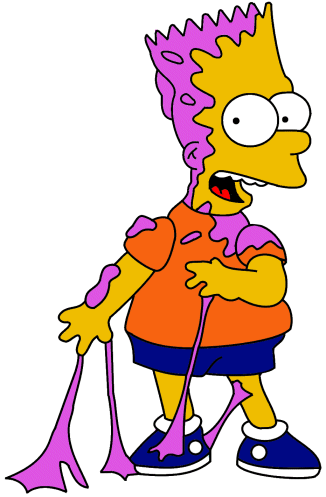

In [ ]:
tf.keras.preprocessing.image.load_img('/content/homer_bart_2/test_set/bart/bart1.bmp')

#train and test set

In [ ]:
train_generator= ImageDataGenerator(rescale=1./255,
                                    rotation_range=7,
                                    horizontal_flip=True,
                                    zoom_range=0.2)

In [ ]:
train_dataset= train_generator.flow_from_directory('/content/homer_bart_2/training_set',
                                                   target_size=(64,64),
                                                   batch_size=8,
                                                   class_mode='categorical',
                                                   shuffle=True)


Found 215 images belonging to 2 classes.


In [ ]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
train_dataset.class_indices

{'bart': 0, 'homer': 1}

In [ ]:
test_generator= ImageDataGenerator(rescale=1./255)
test_dataset= test_generator.flow_from_directory('/content/homer_bart_2/test_set',
                                                 batch_size=1,
                                                 target_size=(64,64),
                                                 class_mode='categorical',
                                                 shuffle=False)

Found 54 images belonging to 2 classes.


# build and train the neural network

In [ ]:
(1152+2)/2 #(input+output)/2

577.0

In [ ]:
network= Sequential()
network.add(Conv2D(filters=32, kernel_size=(3,3),activation='relu',input_shape=(64,64,3)))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters=32, kernel_size=(3,3),activation='relu'))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Flatten())

network.add(Dense(units=577, activation='relu'))
network.add(Dense(units=577, activation='relu'))
network.add(Dense(units=2, activation='softmax'))
network.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 6, 6, 32)        

In [ ]:
network.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
history=network.fit_generator(train_dataset, epochs=50)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


27/27 [==============================] - 3s 63ms/step - loss: 0.6472 - accuracy: 0.5860
Epoch 2/50
27/27 [==============================] - 2s 62ms/step - loss: 0.5732 - accuracy: 0.7163
Epoch 3/50
27/27 [==============================] - 2s 65ms/step - loss: 0.4548 - accuracy: 0.7674
Epoch 4/50
27/27 [==============================] - 2s 62ms/step - loss: 0.4224 - accuracy: 0.7628
Epoch 5/50
27/27 [==============================] - 2s 63ms/step - loss: 0.3792 - accuracy: 0.8233
Epoch 6/50
27/27 [==============================] - 2s 62ms/step - loss: 0.3412 - accuracy: 0.8605
Epoch 7/50
27/27 [==============================] - 2s 61ms/step - loss: 0.3505 - accuracy: 0.8465
Epoch 8/50
27/27 [==============================] - 2s 63ms/step - loss: 0.3112 - accuracy: 0.8512
Epoch 9/50
27/27 [==============================] - 2s 62ms/step - loss: 0.2510 - accuracy: 0.8698
Epoch 10/50
27/27 [==============================] - 2s 62ms/step - loss: 0.2010 - accuracy: 0.9349
Epoch 11/50
27/27 [=

# evaluate the neural network

In [ ]:
prediction= network.predict(test_dataset)
prediction

array([[1.0000000e+00, 1.9377849e-21],
       [1.0000000e+00, 1.7137698e-09],
       [9.8525226e-01, 1.4747767e-02],
       [1.0000000e+00, 6.8528951e-15],
       [1.0000000e+00, 2.2230316e-19],
       [1.0000000e+00, 6.9203566e-15],
       [9.9964380e-01, 3.5618094e-04],
       [8.5838205e-01, 1.4161795e-01],
       [9.9882597e-01, 1.1740699e-03],
       [9.9958235e-01, 4.1762853e-04],
       [9.9999964e-01, 3.6415616e-07],
       [1.0000000e+00, 1.3281277e-10],
       [9.9714273e-01, 2.8572376e-03],
       [1.0000000e+00, 9.1566248e-11],
       [1.0000000e+00, 1.9656009e-12],
       [9.9999893e-01, 1.0449348e-06],
       [9.9999905e-01, 9.7546081e-07],
       [9.9999893e-01, 1.0681337e-06],
       [9.8952276e-01, 1.0477260e-02],
       [1.0000000e+00, 1.9378619e-18],
       [2.4566161e-03, 9.9754339e-01],
       [1.0000000e+00, 1.4328285e-21],
       [9.9999964e-01, 3.9380643e-07],
       [5.5660474e-01, 4.4339526e-01],
       [1.0000000e+00, 5.7187993e-08],
       [9.9982733e-01, 1.

In [ ]:
predictions= np.argmax(prediction, axis=1)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
test_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(test_dataset.classes, predictions)

0.9074074074074074

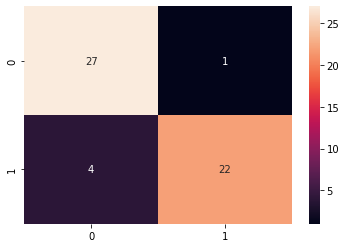

In [ ]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(test_dataset.classes, predictions)
sns.heatmap(cm, annot=True)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_dataset.classes, predictions))

              precision    recall  f1-score   support

           0       0.87      0.96      0.92        28
           1       0.96      0.85      0.90        26

    accuracy                           0.91        54
   macro avg       0.91      0.91      0.91        54
weighted avg       0.91      0.91      0.91        54



#save and load model

In [ ]:
model_json=network.to_json()
with open('network.json','w') as json_file:
  json_file.write(model_json)

In [ ]:
from keras.models import save_model
network_saved= save_model(network,'/content/weights.dhf5')

INFO:tensorflow:Assets written to: /content/weights.dhf5/assets


In [ ]:
with open('network.json','r') as json_file:
  json_saved_model= json_file.read()
json_saved_model

'{"class_name": "Sequential", "config": {"name": "sequential_5", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 64, 64, 3], "dtype": "float32", "sparse": false, "ragged": false, "name": "conv2d_7_input"}}, {"class_name": "Conv2D", "config": {"name": "conv2d_7", "trainable": true, "batch_input_shape": [null, 64, 64, 3], "dtype": "float32", "filters": 32, "kernel_size": [3, 3], "strides": [1, 1], "padding": "valid", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "MaxPooling2D", "config": {"name": "max_pooling2d_7", "trainable": true, "dtype": "float32", "pool_size": [2, 2], "padding": "valid", "strides": [2

In [ ]:
network_loaded= tf.keras.models.model_from_json(json_saved_model)
network_loaded.load_weights('weights.dhf5')
network_loaded.compile(loss='category_crossentropy', optimizer='Adam',metrics=['accuracy'])

network_loaded.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 6, 6, 32)        

# classify one single image

In [ ]:
image=cv2.imread('/content/homer_bart_2/test_set/homer/homer14.bmp')

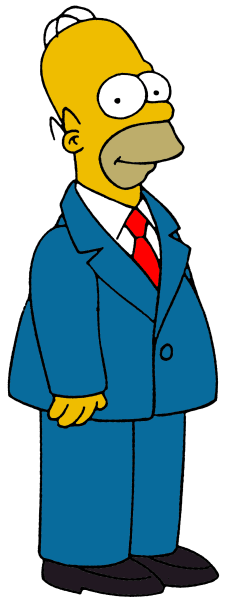

In [ ]:
cv2_imshow(image)

In [ ]:
image.shape

(604, 240, 3)

In [ ]:
image=cv2.resize(image,(64,64))

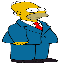

In [ ]:
cv2_imshow(image)

In [ ]:
image= image/255
image

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

In [ ]:
image.shape

(64, 64, 3)

In [ ]:
image= image.reshape(- 1,64,64,3)

In [ ]:
image.shape

(1, 64, 64, 3)

In [ ]:
result= network_loaded.predict(image)
result

array([[0.40970725, 0.59029275]], dtype=float32)

In [ ]:
result= np.argmax(result)

In [ ]:
result

1

In [ ]:
test_dataset.class_indices

{'bart': 0, 'homer': 1}